In [2]:
# %pip install seaborn
# %pip install graphviz


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Make sure the csv is in the same directory
df = pd.read_csv('heart_2020_cleaned.csv')
df.dropna()
pd.set_option('display.max_columns', None)

In [5]:
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [6]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [7]:
# ages = pd.get_dummies(df['AgeCategory'])
# diabetes = pd.get_dummies(df['Diabetic'])
# races = pd.get_dummies(df['Race'])
# healths = pd.get_dummies(df['GenHealth'])
categorical_columns = ['AgeCategory', 'Diabetic', 'Race', 'GenHealth']
for cat in categorical_columns:
    dummy = pd.get_dummies(df[cat])
    df = df.join(dummy)
    
df.rename(columns = {'No':'Diabetic_No', 'Yes': 'Diabetic_Yes', 'Yes (during pregnancy)': 'Diabetic_During_Pregnancy', 'No, borderline diabetes': 'Borderline_Diabetes'}, inplace = True)
df.rename(columns = {'Excellent': 'Excellent_Health', 'Fair': 'Fair_Health', 'Good': 'Good_Health', 'Poor': 'Poor_Health', 'Very good': 'Very_Good_Health'}, inplace = True)
for cat in categorical_columns:
    df.drop([cat], axis=1, inplace=True)

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,5.0,Yes,No,Yes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,Yes,7.0,No,No,No,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,8.0,Yes,No,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,No,6.0,No,No,Yes,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,Yes,8.0,No,No,No,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [9]:
# Only columns that have yes/no values
yes_no_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

# Mapping for yes/no values
yes_no_map = {'Yes': 1, 'No': 0}
male_female_map = {'Male': 1, 'Female': 0}

# Converting that have yes/no values
for cat in yes_no_columns:
    df[cat] = df[cat].map(yes_no_map)
df['Sex'] = df['Sex'].map(male_female_map)

In [10]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [11]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older', 'Diabetic_No', 'Borderline_Diabetes', 'Diabetic_Yes', 'Diabetic_During_Pregnancy', 'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White', 'Excellent_Health', 'Fair_Health', 'Good_Health', 'Poor_Health', 'Very_Good_Health']


In [12]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,-0.100030,0.008327,0.041444,0.145197,0.093317,-0.075385,-0.065759,-0.065611,-0.066685,-0.059196,-0.049733,-0.032648,-0.013276,0.016152,0.042626,0.082578,0.098690,0.143041,-0.170977,0.016182,0.183072,-0.013930,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.116042,0.147954,0.039033,0.174662,-0.101886
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.150616,-0.051822,0.092345,0.050768,-0.033644,-0.107060,-0.023705,0.004500,0.021160,0.036475,0.049427,0.050800,0.038984,0.026797,0.019006,-0.007720,-0.030726,-0.094780,-0.208232,0.049231,0.203494,0.008198,0.026347,-0.078643,0.080672,0.023750,0.012535,-0.049060,-0.179993,0.127364,0.118047,0.062501,-0.065954
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,-0.097174,-0.030336,0.024149,0.034920,0.033977,-0.138397,-0.052149,-0.015226,0.004290,0.010680,-0.006637,-0.011667,0.008701,0.031892,0.030367,0.045288,0.048040,0.013569,-0.055127,0.007143,0.058434,-0.005385,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367,-0.117444,0.095620,0.059651,0.086520,-0.052305
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,0.017487,-0.005065,-0.002202,-0.028280,-0.005702,0.004334,0.023069,0.015902,0.021545,0.018818,0.009857,0.010588,0.008189,0.001621,-0.009026,-0.021730,-0.027861,-0.045226,0.057644,-0.008165,-0.058208,-0.004077,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342,0.015578,-0.018859,-0.007808,-0.017068,0.013005
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,-0.079455,0.011900,0.038866,0.091167,0.048116,-0.048552,-0.040268,-0.040279,-0.038983,-0.033103,-0.025682,-0.016567,-0.001244,0.011316,0.022110,0.039817,0.058948,0.086099,-0.102787,0.011172,0.108407,-0.004526,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154,-0.073916,0.104983,0.013159,0.133641,-0.069395
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,-0.232283,-0.061387,0.117907,0.142197,0.041700,-0.055866,-0.046707,-0.042484,-0.037248,-0.026575,-0.011934,0.008711,0.026416,0.040827,0.021009,0.022623,0.027203,0.039621,-0.153469,0.021437,0.158207,-0.000773,0.022955,-0.035229,0.011371,-0.005571,0.016102,-0.003968,-0.173037,0.303773,-0.037663,0.471919,-0.196462
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.095808,-0.119717,0.114008,0.037281,-0.033412,0.075243,0.054452,0.043741,0.037929,0.025892,0.016566,0.015627,0.006345,-0.015002,-0.043933,-0.055078,-0.054581,-0.071718,-0.032353,0.011056,0.025480,0.018742,0.018394,-0.023113,0.010944,0.011167,0.031385,-0.024489,-0.111877,0.151321,0.013353,0.192079,-0.089956
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,-0.278524,-0.022216,0.103222,0.153064,0.064840,-0.094715,-0.080330,-0.077637,-0.069503,-0.058260,-0.040195,-0.013943,0.016113,0.038116,0.037431,0.057190,0.074948,0.156933,-0.209640,0.031843,0.216605,-0.007040,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516,-0.173606,0.282517,0.031570,0.308767,-0.184986
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,0.048247,-0.015704,-0.069191,-0.009084,0.013434,0.040865,0.026289,0.018928,0.008302,0.001780,-0.000091,-0.000380,0.002744,0.002120,-0.002596,-0.016669,-0.022959,-0.048396,0.003636,-0.004295,0.020718,-0.085477,-0.003434,0.0

([<matplotlib.patches.Wedge at 0x1afebe81430>,
 [Text(1.0604683173239722, 0.29224467138352267, 'Has Heart Disease'),
  Text(-1.0604683446858885, -0.2922445720953119, 'Does Not Have Heart Disease')])

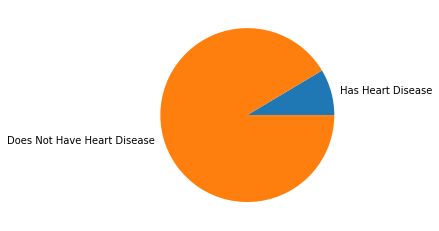

In [13]:
row_heart_yes = df.loc[df['HeartDisease'] == 1]
row_heart_no = df.loc[df['HeartDisease'] == 0]
row_kidney_yes = df.loc[df['KidneyDisease'] == 1]
row_kidney_no = df.loc[df['KidneyDisease'] == 0]
row_diabetes_yes = df['Diabetic_Yes']
row_diabetes_no = df['Diabetic_No']
heart_labels = ['Has Heart Disease', 'Does Not Have Heart Disease']
plt.pie([len(row_heart_yes), len(row_heart_no)], labels = heart_labels)

([<matplotlib.patches.Wedge at 0x1afeed0c6a0>,
 [Text(1.0926438384423367, 0.12700174138175013, 'Has Kidney Disease'),
  Text(-1.0926438458740606, -0.12700167744381283, 'Does Not Have Kidney Disease')])

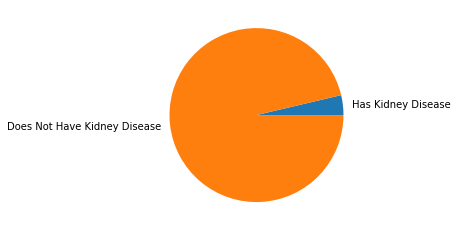

In [14]:
kidney_labels = ['Has Kidney Disease', 'Does Not Have Kidney Disease']
plt.pie([len(row_kidney_yes), len(row_kidney_no)], labels = kidney_labels)

([<matplotlib.patches.Wedge at 0x1afeed534c0>,
 [Text(1.0075622294357416, 0.44138232159260565, 'Has Diabetes'),
  Text(-1.0075622294357416, -0.4413823215926054, 'Does Not Have Diabetes')])

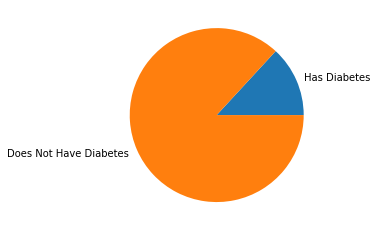

In [15]:
diabetes_labels = ['Has Diabetes', 'Does Not Have Diabetes']
plt.pie([sum(row_diabetes_yes), sum(row_diabetes_no)], labels = diabetes_labels)

In [16]:
sample_size_heart = 10000

sample_heart_yes = row_heart_yes.sample(sample_size_heart)
sample_heart_no = row_heart_no.sample(sample_size_heart)

df_sample = pd.concat([sample_heart_yes, sample_heart_no])
df_sample.corr()

target = 'HeartDisease'

heart_disease_pearson = df_sample.corr('pearson')[[target]].sort_values(by=target, ascending=False)
heart_disease_spearman = df_sample.corr('spearman')[[target]].sort_values(by=target, ascending=False)

print(heart_disease_pearson[1:10])
print(heart_disease_spearman[1:10])

                HeartDisease
DiffWalking         0.293339
Diabetic_Yes        0.266450
PhysicalHealth      0.237222
Stroke              0.228259
Fair_Health         0.216701
Poor_Health         0.207179
80 or older         0.196770
Smoking             0.190505
KidneyDisease       0.174647
                HeartDisease
DiffWalking         0.293339
Diabetic_Yes        0.266450
PhysicalHealth      0.231935
Stroke              0.228259
Fair_Health         0.216701
Poor_Health         0.207179
80 or older         0.196770
Smoking             0.190505
KidneyDisease       0.174647


In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df_sample.corr(), annot=True)

<AxesSubplot:>

In [ ]:
# fig, ax = plt.subplots(1,2, figsize=(20, 8))
# target = 'HeartDisease'

# heart_disease_pearson = df.corr('pearson')[[target]].sort_values(by=target, ascending=False)
# heart_disease_spearman = df.corr('spearman')[[target]].sort_values(by=target, ascending=False)

# sns.heatmap(heart_disease_pearson, ax=ax[0], annot=True)
# sns.heatmap(heart_disease_spearman, ax=ax[1], annot=True)

# ax[0].set_xlabel("Pearson")
# ax[1].set_xlabel("Spearman")

In [ ]:
from sklearn import tree

keepThese = ['DiffWalking', 'PhysicalHealth', 'Diabetic_Yes', 'Stroke', 'Poor_Health']
#dropThese = ['HeartDisease','Sex','AgeCategory','Race','GenHealth','HeartDisease_val','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

#X = df_sample.drop(columns=dropThese)
X = df_sample[keepThese]
Y = df_sample['HeartDisease']

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, Y)
plt.figure(figsize=(40,40))
tree.plot_tree(clf, fontsize=40, feature_names=keepThese, class_names=['No HD', 'Yes HD'])


In [ ]:
# Test decision tree accuracy
testSize = 10000
testData = df.sample(testSize)
predictedLabel = clf.predict(testData[keepThese])
accuracy = sum(predictedLabel == testData["HeartDisease"]) / testSize
accuracy

In [ ]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                   feature_names=keepThese,  
#                    class_names=["No HD", "Yes HD"],  
#                      filled=True, rounded=True,  
#                     special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph